## 7. Clustering using K-means

In this section, we apply K-means clustering to the preprocessed dataset in order to discover natural groups of students based on their stress-related attributes.
 We experiment with different values of K, evaluate the quality of the clusters using WCSS (Elbow method) and Silhouette score, and visualize the resulting clusters.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the preprocessed dataset (Phase 2 output)
url = "https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)

# Use all features except the class label for clustering
X = df.drop('stress_level', axis=1)

X.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,future_career_concerns,social_support,bullying
0,0.666667,0.666667,0,0.407407,0.4,0.0,0.4,0.6,0.666667,0.4
1,0.714286,0.266667,1,0.555556,1.0,1.0,0.2,1.0,0.333333,1.0
2,0.571429,0.600000,1,0.518519,0.4,0.0,0.4,0.4,0.666667,0.4
3,0.761905,0.400000,1,0.555556,0.8,1.0,0.2,0.8,0.333333,1.0
4,0.761905,0.933333,0,0.259259,0.4,1.0,1.0,0.4,0.333333,1.0


### 7.1 Fitting K-means with different K values

We fit K-means with three different values of K to explore how the dataset behaves with different numbers of clusters. This will be used later for evaluation and comparison.


In [ ]:
# Define the K values to test
K_values = [2, 3, 4]

kmeans_models = {}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    kmeans_models[k] = kmeans

print("Finished fitting K-means models for K =", K_values)


Finished fitting K-means models for K = [2, 3, 4]


### 7.2 Elbow Method (WCSS)

The Elbow method uses the total within-cluster sum of squares (WCSS) to measure how compact the clusters are for each K. We plot WCSS against K and look for the 'elbow' point where adding more clusters does not significantly reduce WCSS.

,K,WCSS
0,2,645.698898
1,3,458.402850
2,4,338.330539


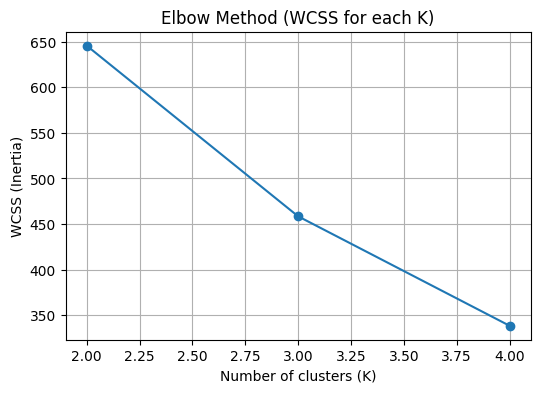

In [ ]:
# Calculate WCSS (inertia) for each K in K_values
wcss_values = []

for k in K_values:
    model = kmeans_models[k]
    wcss_values.append(model.inertia_)  # inertia_ = total within-cluster sum of squares

elbow_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss_values
})

display(elbow_df)

plt.figure(figsize=(6,4))
plt.plot(K_values, wcss_values, marker='o')
plt.title('Elbow Method (WCSS for each K)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

### 7.3 Silhouette Score for each K

The Silhouette score measures how well-separated and cohesive the clusters are. A higher score indicates better-defined clusters. We compute the average Silhouette score for each K.

,K,Silhouette Score
0,2,0.469295
1,3,0.475398
2,4,0.519519


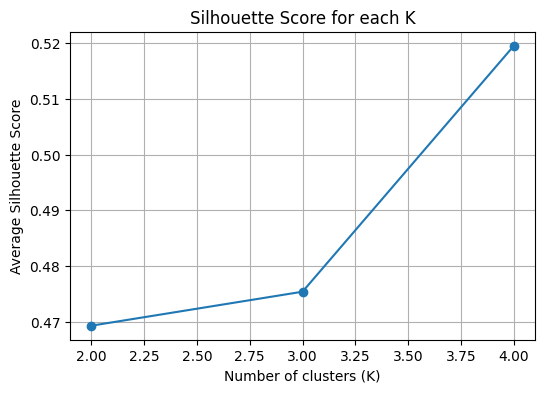

In [ ]:
silhouette_values = []

for k in K_values:
    model = kmeans_models[k]
    labels = model.labels_
    score = silhouette_score(X, labels)
    silhouette_values.append(score)

silhouette_df = pd.DataFrame({
    'K': K_values,
    'Silhouette Score': silhouette_values
})

display(silhouette_df)

plt.figure(figsize=(6,4))
plt.plot(K_values, silhouette_values, marker='o')
plt.title('Silhouette Score for each K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

### 7.4 Combined comparison table

This table summarizes the WCSS and Silhouette scores for each K value. It helps us select the most appropriate K based on both compactness and separation of clusters.

In [12]:
comparison_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss_values,
    'Silhouette Score': silhouette_values
})


### 7.5 Cluster visualization using PCA (for the best K)

To visualize the clusters, we select the best K based on the highest Silhouette score and project the data into two principal components using PCA. Each point is colored according to its assigned cluster.

Best K based on Silhouette Score: 4


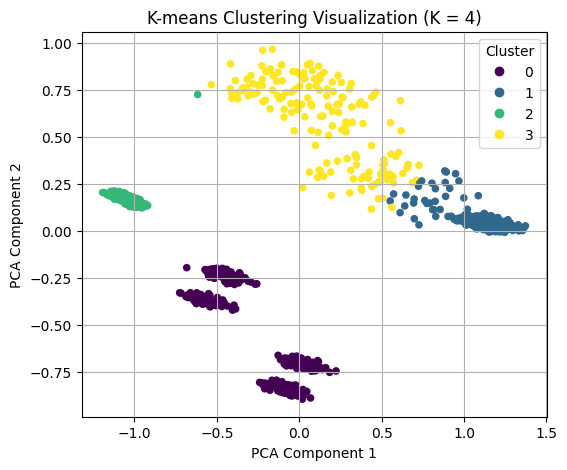

In [14]:
# Choose the best K based on the highest Silhouette score
best_index = silhouette_df['Silhouette Score'].idxmax()
best_K = silhouette_df.loc[best_index, 'K']
best_model = kmeans_models[best_K]

print("Best K based on Silhouette Score:", best_K)

# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

clusters = best_model.labels_

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=20)
plt.title(f'K-means Clustering Visualization (K = {best_K})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Get legend elements from scatter
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster", loc='best')

plt.grid(True)
plt.show()